[*********************100%%**********************]  1 of 1 completed


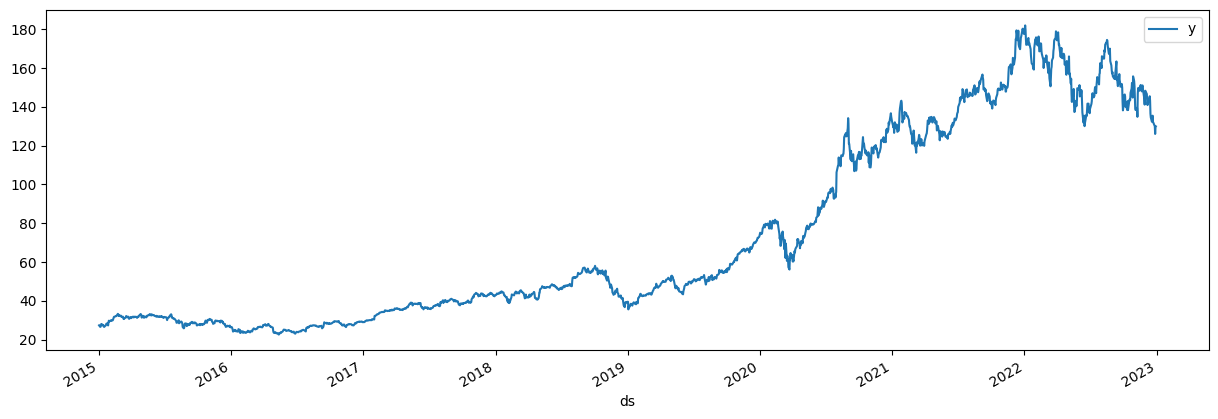

In [15]:
import pandas as pd
import yfinance as yf

df = yf.download("AAPL", start = "2015-01-01", end = "2023-01-01")
df = df["Close"]
df = df.reset_index()
df = df.rename(columns={"Date":"ds", "Close":"y"})

# Plot the dataset, showing price (y column) over time (ds column)
plt = df.plot(x="ds", y="y", figsize=(15, 5))


In [16]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Create a NeuralProphet model with default parameters
m = NeuralProphet()
# Use static plotly in notebooks
m.set_plotting_backend("plotly-static")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df)

Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 63it [00:00, ?it/s]

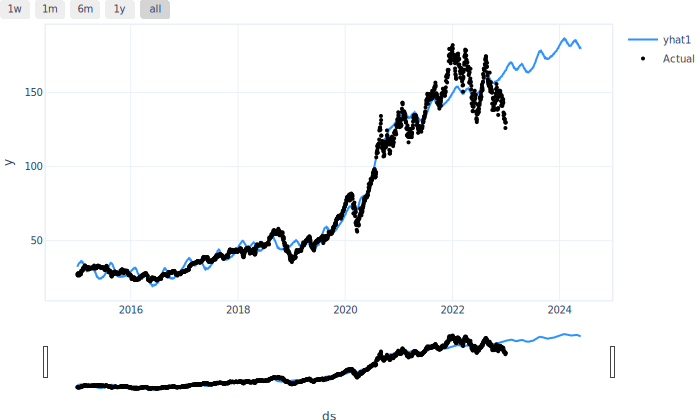

In [17]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=365)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

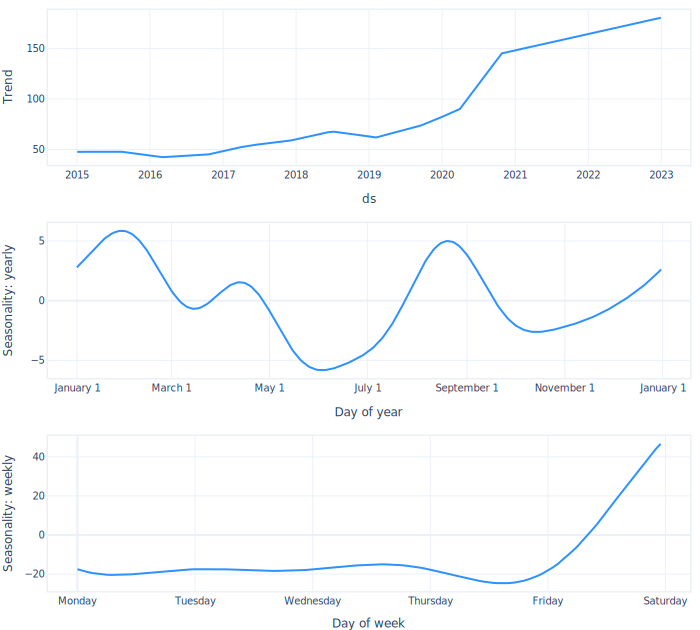

In [18]:
m.plot_parameters(components=["trend", "seasonality"])

[*********************100%%**********************]  4 of 4 completed


                    AAPL        AMZN        GOOGL       MSFT
------------------  ----------  ----------  ----------  ----------
Start Period        2010-01-05  2010-01-05  2010-01-05  2010-01-05
End Period          2021-12-30  2021-12-30  2021-12-30  2021-12-30
Risk-Free Rate      0.0%        0.0%        0.0%        0.0%
Time in Market      100.0%      100.0%      100.0%      100.0%

Cumulative Return   2,619.35%   2,418.96%   832.14%     1,319.45%
CAGR﹪              20.94%      20.41%      13.71%      16.5%

Sharpe              1.12        1.02        0.85        1.01
Prob. Sharpe Ratio  99.99%      99.98%      99.85%      99.98%
Sortino             1.66        1.54        1.27        1.5
Sortino/√2          1.17        1.09        0.9         1.06
Omega               1.22        1.22        1.22        1.22

Max Drawdown        -43.8%      -34.1%      -30.87%     -28.04%
Longest DD Days     660         517         505         651

Gain/Pain Ratio     0.22        0.2         0.17     

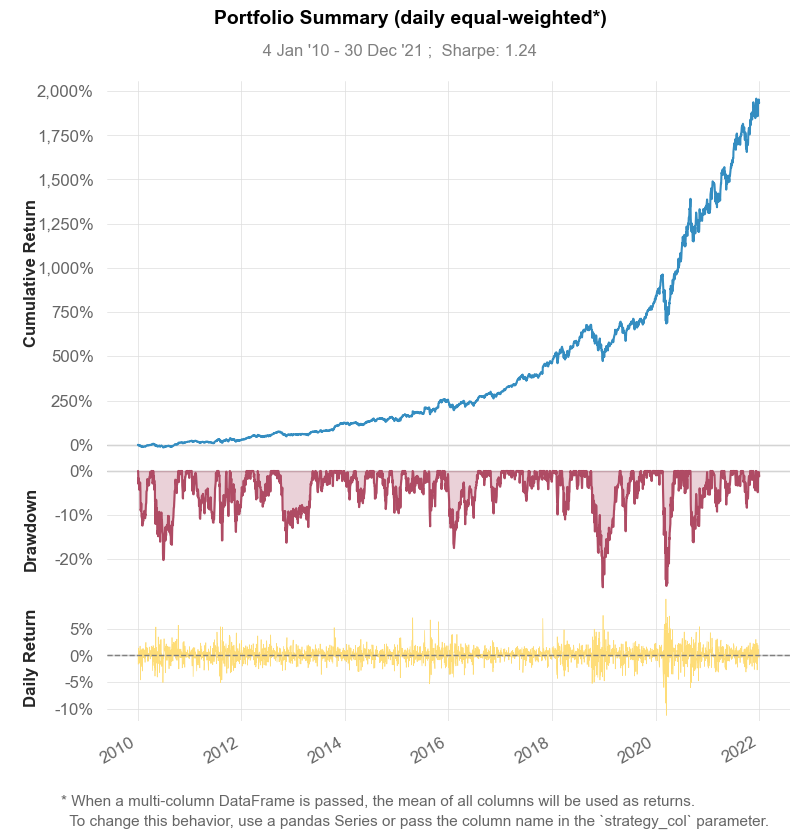

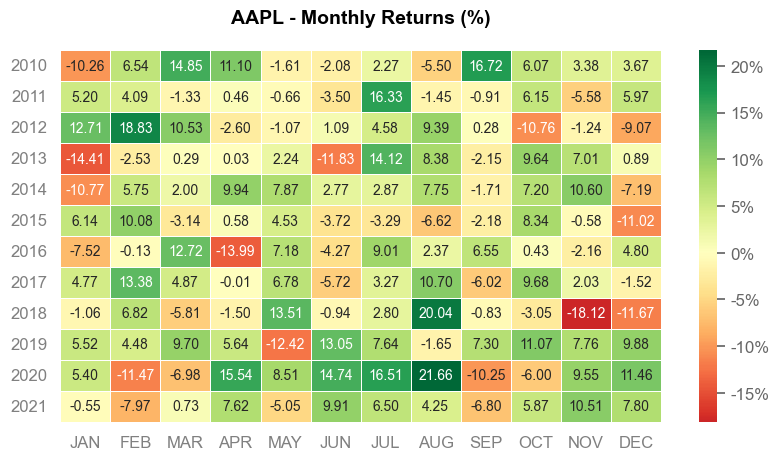

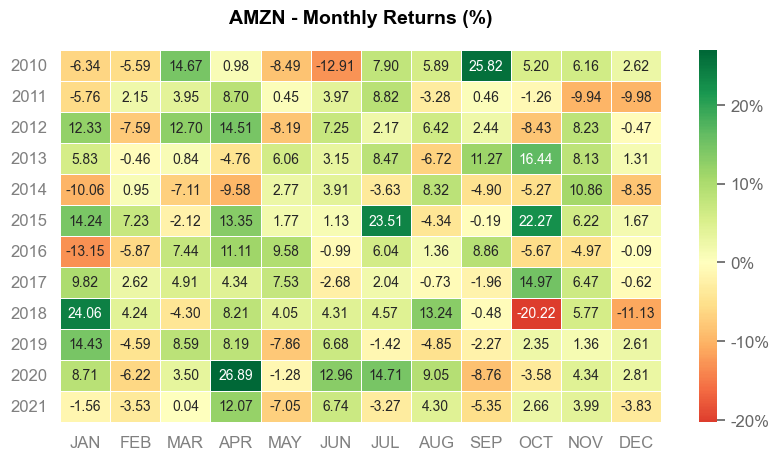

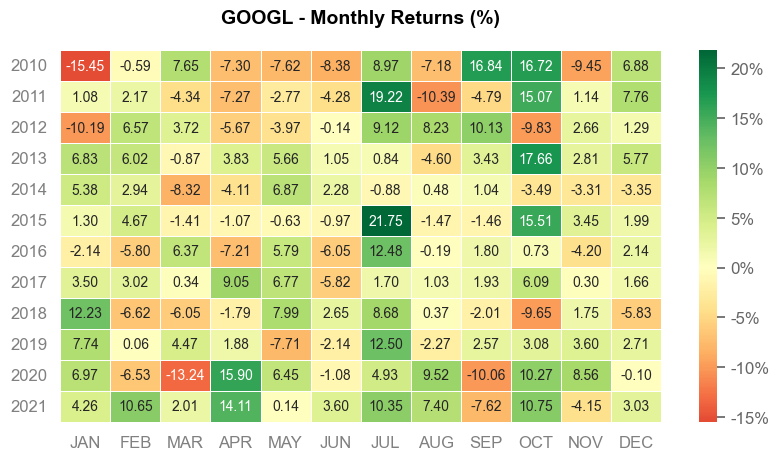

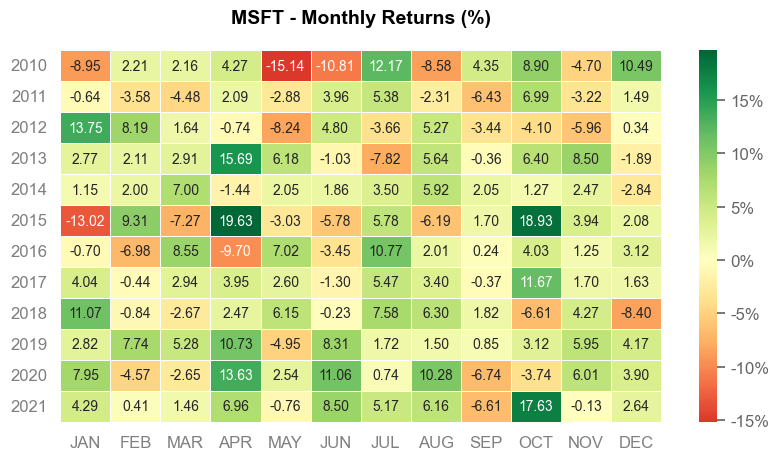

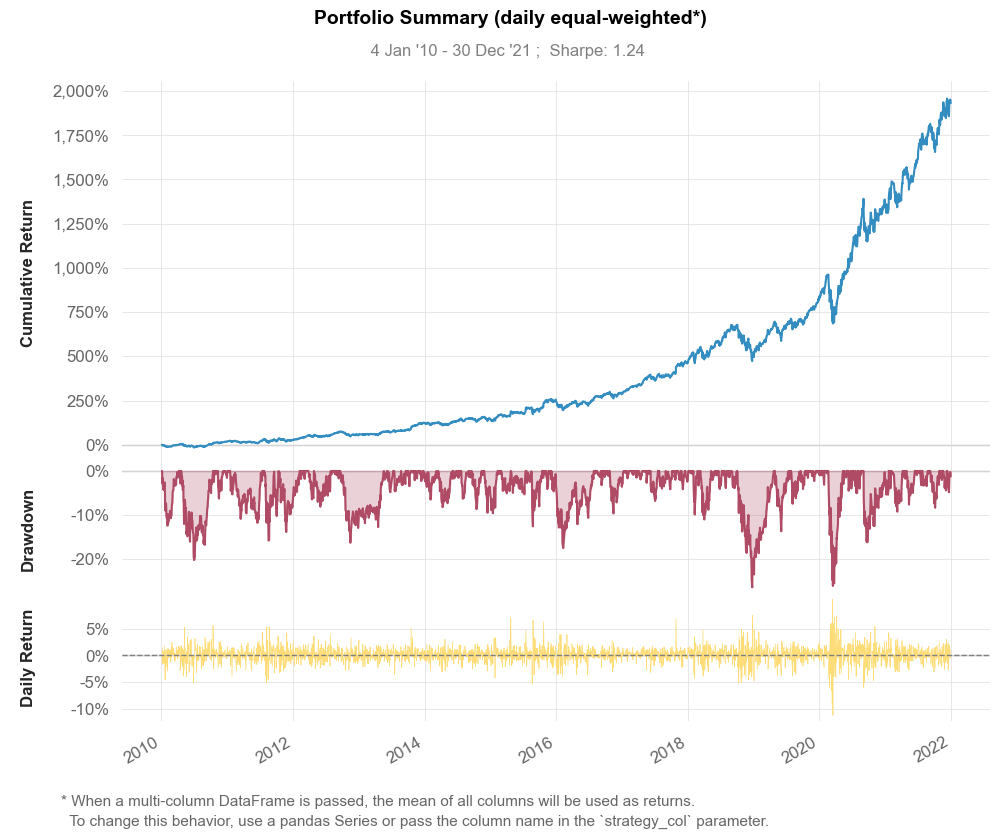

In [20]:
import pandas as pd
import quantstats as qs
import yfinance as yf

# Fetch historical data for some stocks
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']
start_date = '2010-01-01'
end_date = '2021-12-31'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Perform basic portfolio analysis
qs.reports.basic(returns)

# Plot cumulative returns
qs.plots.snapshot(returns)